In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../result/sudah-sentiment.csv')
df.head()

,text,cleaned1,sentiment,emotion
0,Bukan pak Tom yang mencari kebenaran tapi kebe...,bukan pak tom yang mencari kebenaran tapi kebe...,positive,happy
1,Di duga hukuman 4.5 tahun penjara Terhadap bap...,di duga hukuman tahun penjara terhadap bapak t...,neutral,fear
2,"ingat Saddam Hussein pak Anis, beliau difitnah...",ingat saddam hussein pak anis beliau difitnah ...,positive,anger
3,Innalilahi wa innailaihi rojiun. Turut berduka...,innalilahi wa innailaihi rojiun turut berdukac...,positive,sadness
4,Yang menzalimi pak Tom segera dapat azab yang ...,yang menzalimi pak tom segera dapat azab yang ...,negative,sadness


In [4]:
# cek apakah kolom cleaned1 ada yg null
df['cleaned1'].isnull().sum()

1082

In [8]:
# lihat total data df
df.shape[0]

7088

# VIZ

## Sentiment

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

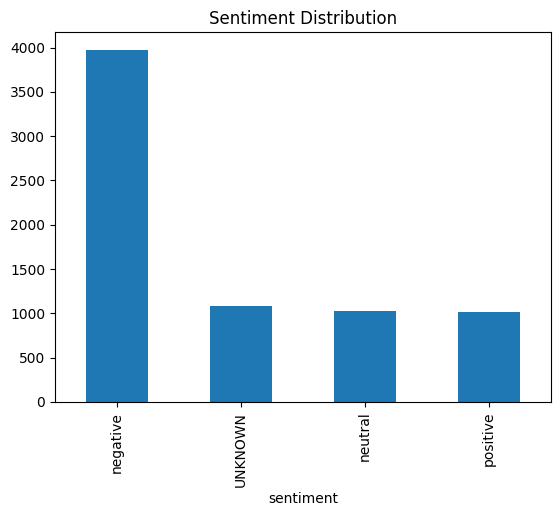

In [3]:
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')

In [10]:
df['sentiment'].value_counts()

sentiment
negative    3975
UNKNOWN     1082
neutral     1022
positive    1009
Name: count, dtype: int64

In [12]:
negative = 3975/6006
neutral = 1022/6006
positive = 1009/6006

print(f"Negative: {negative:.2%}, Neutral: {neutral:.2%}, Positive: {positive:.2%}")

Negative: 66.18%, Neutral: 17.02%, Positive: 16.80%


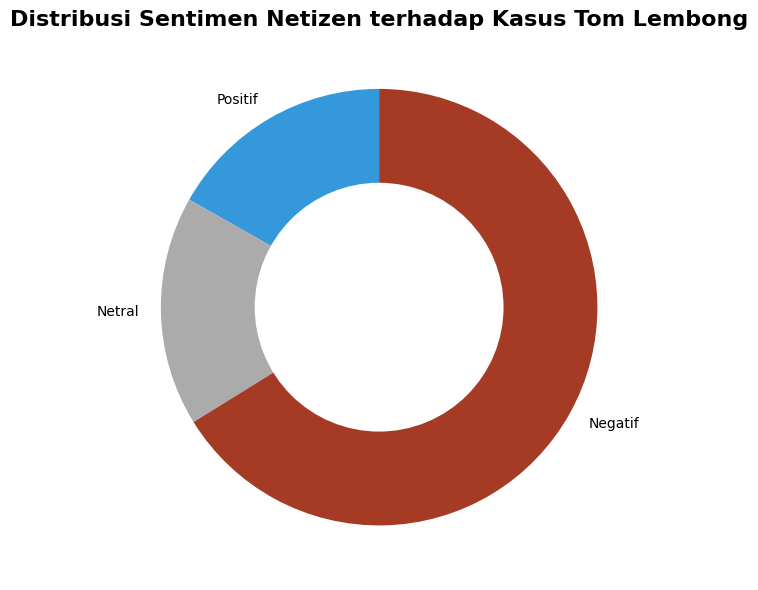

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Contoh data (ganti dengan data kamu sendiri)
sentiment_counts = pd.Series({
    'Positif': 16.80,
    'Netral': 17.02,
    'Negatif': 66.18,
})

# Warna disesuaikan
colors = [
    '#3498db',  # Biru untuk Positif
    "#ABABAB",  # Abu-abu untuk Netral
    "#a53a25"   # Merah untuk Negatif
]

# Plot donut chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts = ax.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    # autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops=dict(color="black")
)

# Buat lubang di tengah agar menjadi donut
centre_circle = plt.Circle((0, 0), 0.57, fc='white')
fig.gca().add_artist(centre_circle)

# Judul dan layout
plt.title("Distribusi Sentimen Netizen terhadap Kasus Tom Lembong", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


## Emotion

<Axes: title={'center': 'Emotion Distribution'}, xlabel='emotion'>

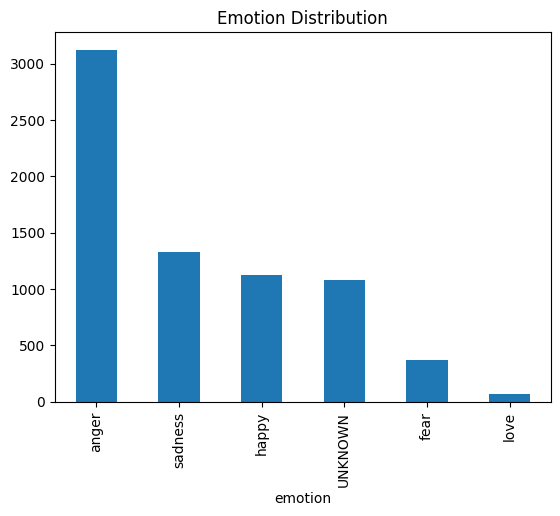

In [14]:
df['emotion'].value_counts().plot(kind='bar', title='Emotion Distribution')

In [15]:
df['emotion'].value_counts()

emotion
anger      3122
sadness    1325
happy      1121
UNKNOWN    1082
fear        372
love         66
Name: count, dtype: int64

In [16]:
anger = 3122/6006
sadness = 1325/6006
happy = 1121/6006
fear = 372/6006
love = 66/6006

print(f"Anger: {anger:.2%}, Sadness: {sadness:.2%}, Happy: {happy:.2%}, Fear: {fear:.2%}, Love: {love:.2%}")

Anger: 51.98%, Sadness: 22.06%, Happy: 18.66%, Fear: 6.19%, Love: 1.10%


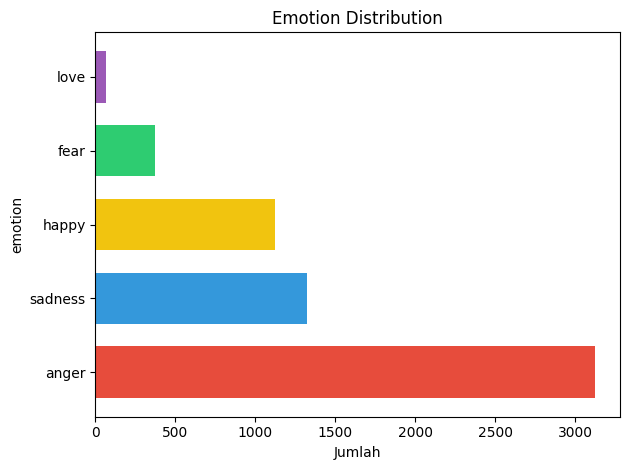

In [19]:
# Plot bar chart horizontal untuk distribusi emotion, kecuali 'UNKNOWN', dengan warna berbeda-beda
emotion_counts = df['emotion'].value_counts()
emotion_counts = emotion_counts[emotion_counts.index != 'UNKNOWN']

# Pilih warna berbeda untuk setiap bar
bar_colors = ['#e74c3c', '#3498db', '#f1c40f', '#2ecc71', '#9b59b6'][:len(emotion_counts)]

emotion_counts.plot(
    kind='barh',                # horizontal bar
    title='Emotion Distribution',
    color=bar_colors,
    width=0.7                   # bar lebih berdempetan (default 0.8)
)
plt.xlabel('Jumlah')
plt.tight_layout()
plt.show()

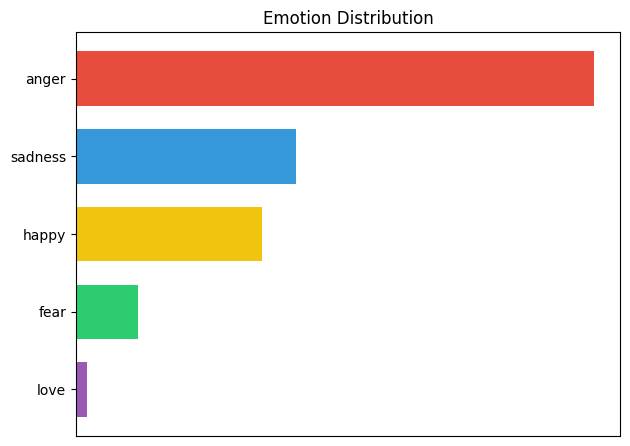

In [22]:
# Plot bar chart horizontal untuk distribusi emotion, urutan dibalik, tanpa angka
emotion_counts = df['emotion'].value_counts()
emotion_counts = emotion_counts[emotion_counts.index != 'UNKNOWN']

# Balik urutan
emotion_counts = emotion_counts[::-1]

# Pilih warna berbeda untuk setiap bar
bar_colors = ['#e74c3c', '#3498db', '#f1c40f', '#2ecc71', '#9b59b6'][:len(emotion_counts)]
# warna kebalikan
bar_colors.reverse()

ax = emotion_counts.plot(
    kind='barh',
    title='Emotion Distribution',
    color=bar_colors,
    width=0.7
)

plt.xlabel('')  # Hilangkan label sumbu X
plt.ylabel('')  # Hilangkan label sumbu Y
ax.bar_label(ax.containers[0], labels=['']*len(emotion_counts))  # Hilangkan angka pada bar
plt.tight_layout()
plt.gca().axes.get_xaxis().set_visible(False)  # Hilangkan angka di sumbu X
plt.show()